In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import missingno as mn
!pip install category_encoders
import category_encoders as ce
import math
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Ridge, Lasso
from sklearn.metrics import mean_absolute_error as mae, mean_squared_error as mse, r2_score as r2
from sklearn.metrics import accuracy_score as accuracy_score
from sklearn.datasets import load_iris
from sklearn.datasets import load_diabetes

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 996.9 kB/s eta 0:00:00


In [ ]:
b=pd.read_csv("/content/drive/MyDrive/Databases/Beer_Consumption_data_prediction.csv",parse_dates=["Data"],dayfirst=True)

In [ ]:
b.head()

,Data,Temperatura Media (C),Temperatura Minima (C),Temperatura Maxima (C),Precipitacao (mm),Final de Semana,Consumo de cerveja (litros)
0,2015-01-01,"27,3","23,9","32,5",0,0.0,25.461
1,2015-01-02,"27,02","24,5","33,5",0,0.0,28.972
2,2015-01-03,"24,82","22,4","29,9",0,1.0,30.814
3,2015-01-04,"23,98","21,5","28,6","1,2",1.0,29.799
4,2015-01-05,"23,82",21,"28,3",0,0.0,28.900


In [ ]:
b.columns=["date","average_temperature","minimum_temperature","maximum_temperature","precipitation (mm)","weekend","beer_consumption"]

In [ ]:
b.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
weekend,365.0,0.284932,0.452001,0.000,0.000,0.000,1.000,1.000
beer_consumption,365.0,25.401367,4.399143,14.343,22.008,24.867,28.631,37.937


In [ ]:
b.head()

,date,average_temperature,minimum_temperature,maximum_temperature,precipitation (mm),weekend,beer_consumption
0,2015-01-01,"27,3","23,9","32,5",0,0.0,25.461
1,2015-01-02,"27,02","24,5","33,5",0,0.0,28.972
2,2015-01-03,"24,82","22,4","29,9",0,1.0,30.814
3,2015-01-04,"23,98","21,5","28,6","1,2",1.0,29.799
4,2015-01-05,"23,82",21,"28,3",0,0.0,28.900


In [ ]:
b.head()

,date,average_temperature,minimum_temperature,maximum_temperature,precipitation (mm),weekend,beer_consumption
0,2015-01-01,"27,3","23,9","32,5",0,0.0,25.461
1,2015-01-02,"27,02","24,5","33,5",0,0.0,28.972
2,2015-01-03,"24,82","22,4","29,9",0,1.0,30.814
3,2015-01-04,"23,98","21,5","28,6","1,2",1.0,29.799
4,2015-01-05,"23,82",21,"28,3",0,0.0,28.900


In [ ]:
for col in ["average_temperature", "minimum_temperature", "maximum_temperature", "precipitation (mm)"]:
    b[col] = b[col].str.replace(",", ".").astype(float)

In [ ]:
b.head()

,date,average_temperature,minimum_temperature,maximum_temperature,precipitation (mm),weekend,beer_consumption
0,2015-01-01,27.30,23.9,32.5,0.0,0.0,25.461
1,2015-01-02,27.02,24.5,33.5,0.0,0.0,28.972
2,2015-01-03,24.82,22.4,29.9,0.0,1.0,30.814
3,2015-01-04,23.98,21.5,28.6,1.2,1.0,29.799
4,2015-01-05,23.82,21.0,28.3,0.0,0.0,28.900


In [ ]:
b.shape

(941, 7)

In [ ]:
round(b.describe().transpose(),2)

,count,mean,std,min,25%,50%,75%,max
average_temperature,365.0,21.23,3.18,12.90,19.02,21.38,23.28,28.86
minimum_temperature,365.0,17.46,2.83,10.60,15.30,17.90,19.60,24.50
maximum_temperature,365.0,26.61,4.32,14.50,23.80,26.90,29.40,36.50
precipitation (mm),365.0,5.20,12.42,0.00,0.00,0.00,3.20,94.80
weekend,365.0,0.28,0.45,0.00,0.00,0.00,1.00,1.00
beer_consumption,365.0,25.40,4.40,14.34,22.01,24.87,28.63,37.94


In [ ]:
b.isnull().all()

date                   False
average_temperature    False
minimum_temperature    False
maximum_temperature    False
precipitation (mm)     False
weekend                False
beer_consumption       False
dtype: bool

In [ ]:
b.isnull().any()

date                   True
average_temperature    True
minimum_temperature    True
maximum_temperature    True
precipitation (mm)     True
weekend                True
beer_consumption       True
dtype: bool

In [ ]:
b.isnull().sum()

date                   576
average_temperature    576
minimum_temperature    576
maximum_temperature    576
precipitation (mm)     576
weekend                576
beer_consumption       576
dtype: int64

In [ ]:
b.isna().any()

date                   True
average_temperature    True
minimum_temperature    True
maximum_temperature    True
precipitation (mm)     True
weekend                True
beer_consumption       True
dtype: bool

In [ ]:
b.isnull().sum().index

Index(['date', 'average_temperature', 'minimum_temperature',
       'maximum_temperature', 'precipitation (mm)', 'weekend',
       'beer_consumption'],
      dtype='object')

In [ ]:
b.isnull().sum().keys()

Index(['date', 'average_temperature', 'minimum_temperature',
       'maximum_temperature', 'precipitation (mm)', 'weekend',
       'beer_consumption'],
      dtype='object')

In [ ]:
b.isnull().sum().values

array([576, 576, 576, 576, 576, 576, 576])

In [ ]:
summary=pd.DataFrame({"columns":b.isnull().sum().keys(),"missing_values":b.isnull().sum().values,"percentage":round(b.isnull().sum()/len(b)*100,2)})

In [ ]:
summary

,columns,missing_values,percentage
date,date,576,61.21
average_temperature,average_temperature,576,61.21
minimum_temperature,minimum_temperature,576,61.21
maximum_temperature,maximum_temperature,576,61.21
precipitation (mm),precipitation (mm),576,61.21
weekend,weekend,576,61.21
beer_consumption,beer_consumption,576,61.21


In [ ]:
b.dropna(how="all",inplace=True)

In [ ]:
b.head()

,date,average_temperature,minimum_temperature,maximum_temperature,precipitation (mm),weekend,beer_consumption
0,2015-01-01,27.30,23.9,32.5,0.0,0.0,25.461
1,2015-01-02,27.02,24.5,33.5,0.0,0.0,28.972
2,2015-01-03,24.82,22.4,29.9,0.0,1.0,30.814
3,2015-01-04,23.98,21.5,28.6,1.2,1.0,29.799
4,2015-01-05,23.82,21.0,28.3,0.0,0.0,28.900


In [ ]:
b.shape

(365, 7)

In [ ]:
b.replace({",":"."} , regex=True, inplace=True)

In [ ]:
b.head()

,date,average_temperature,minimum_temperature,maximum_temperature,precipitation (mm),weekend,beer_consumption
0,2015-01-01,27.30,23.9,32.5,0.0,0.0,25.461
1,2015-01-02,27.02,24.5,33.5,0.0,0.0,28.972
2,2015-01-03,24.82,22.4,29.9,0.0,1.0,30.814
3,2015-01-04,23.98,21.5,28.6,1.2,1.0,29.799
4,2015-01-05,23.82,21.0,28.3,0.0,0.0,28.900


In [ ]:
b.date

0      2015-01-01
1      2015-01-02
2      2015-01-03
3      2015-01-04
4      2015-01-05
          ...    
360    2015-12-27
361    2015-12-28
362    2015-12-29
363    2015-12-30
364    2015-12-31
Name: date, Length: 365, dtype: object

In [ ]:
b.date.dtype

dtype('O')

In [ ]:
b["date"]=pd.to_datetime(b["date"])

In [ ]:
b.date.dtype

dtype('<M8[ns]')

In [ ]:
b['day_of_week'] = b['date'].dt.day_name()

In [ ]:
b.head()

,date,average_temperature,minimum_temperature,maximum_temperature,precipitation (mm),weekend,beer_consumption,day_of_week
0,2015-01-01,27.30,23.9,32.5,0.0,0.0,25.461,Thursday
1,2015-01-02,27.02,24.5,33.5,0.0,0.0,28.972,Friday
2,2015-01-03,24.82,22.4,29.9,0.0,1.0,30.814,Saturday
3,2015-01-04,23.98,21.5,28.6,1.2,1.0,29.799,Sunday
4,2015-01-05,23.82,21.0,28.3,0.0,0.0,28.900,Monday


In [ ]:
b['year'] = b['date'].dt.year
b['month_name'] = b['date'].dt.month_name()
b['month_number'] = b['date'].dt.month

In [ ]:
b.head()

,date,average_temperature,minimum_temperature,maximum_temperature,precipitation (mm),weekend,beer_consumption,day_of_week,year,month_name,month_number
0,2015-01-01,27.30,23.9,32.5,0.0,0.0,25.461,Thursday,2015,January,1
1,2015-01-02,27.02,24.5,33.5,0.0,0.0,28.972,Friday,2015,January,1
2,2015-01-03,24.82,22.4,29.9,0.0,1.0,30.814,Saturday,2015,January,1
3,2015-01-04,23.98,21.5,28.6,1.2,1.0,29.799,Sunday,2015,January,1
4,2015-01-05,23.82,21.0,28.3,0.0,0.0,28.900,Monday,2015,January,1


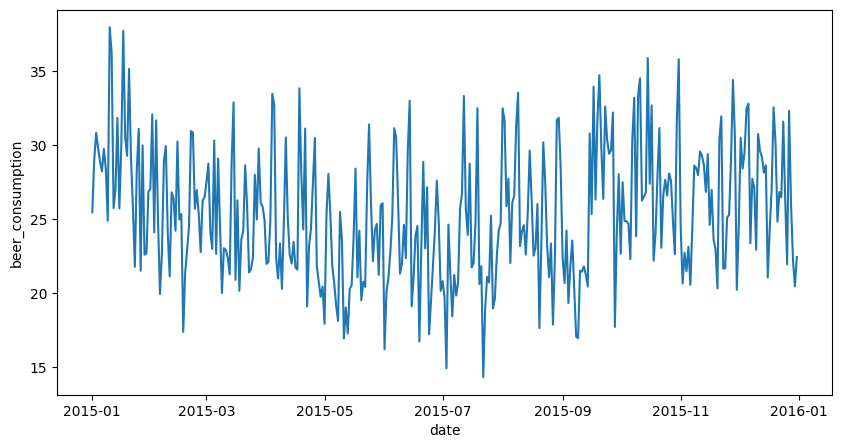

In [ ]:
plt.figure(figsize=(10,5))
sns.lineplot(x="date",y="beer_consumption",data=b);

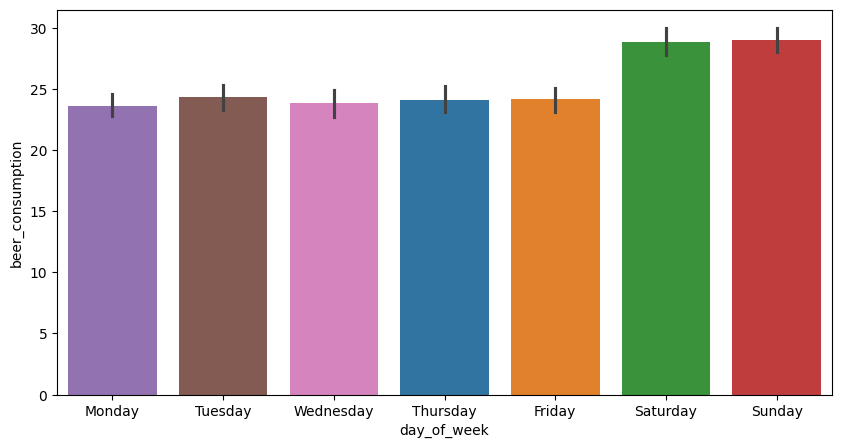

In [ ]:
day_order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
plt.figure(figsize=(10,5))
sns.barplot(x="day_of_week",y="beer_consumption",data=b,hue="day_of_week",order=day_order);

In [ ]:
b.head()

,date,average_temperature,minimum_temperature,maximum_temperature,precipitation (mm),weekend,beer_consumption,day_of_week,year,month_name,month_number
0,2015-01-01,27.30,23.9,32.5,0.0,0.0,25.461,Thursday,2015,January,1
1,2015-01-02,27.02,24.5,33.5,0.0,0.0,28.972,Friday,2015,January,1
2,2015-01-03,24.82,22.4,29.9,0.0,1.0,30.814,Saturday,2015,January,1
3,2015-01-04,23.98,21.5,28.6,1.2,1.0,29.799,Sunday,2015,January,1
4,2015-01-05,23.82,21.0,28.3,0.0,0.0,28.900,Monday,2015,January,1


In [ ]:
b["day_number"]=b["date"].dt.day

In [ ]:
b.drop(["day_number"],axis=1,inplace=True)

In [ ]:
no={"Monday":1,"Tuesday":2,"Wednesday":3,"Thursday":4,"Friday":5,"Saturday":6,"Sunday":7}
b["day_number"]=b["day_of_week"].map(no)

In [ ]:
b.head(15)

,date,average_temperature,minimum_temperature,maximum_temperature,precipitation (mm),weekend,beer_consumption,day_of_week,year,month_name,month_number,day_number
0,2015-01-01,27.30,23.9,32.5,0.0,0.0,25.461,Thursday,2015,January,1,4
1,2015-01-02,27.02,24.5,33.5,0.0,0.0,28.972,Friday,2015,January,1,5
2,2015-01-03,24.82,22.4,29.9,0.0,1.0,30.814,Saturday,2015,January,1,6
3,2015-01-04,23.98,21.5,28.6,1.2,1.0,29.799,Sunday,2015,January,1,7
4,2015-01-05,23.82,21.0,28.3,0.0,0.0,28.900,Monday,2015,January,1,1
5,2015-01-06,23.78,20.1,30.5,12.2,0.0,28.218,Tuesday,2015,January,1,2
6,2015-01-07,24.00,19.5,33.7,0.0,0.0,29.732,Wednesday,2015,January,1,3
7,2015-01-08,24.90,19.5,32.8,48.6,0.0,28.397,Thursday,2015,January,1,4
8,2015-01-09,28.20,21.9,34.0,4.4,0.0,24.886,Friday,2015,January,1,5
9,2015-01-10,26.76,22.1,34.2,0.0,1.0,37.937,Saturday,2015,January,1,6


In [ ]:
x=b.drop(["beer_consumption","date","month_name","day_of_week"],axis=1)
y=b["beer_consumption"]

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [ ]:
lr=LinearRegression()

In [ ]:
lr.fit(x_train,y_train)

LinearRegression()

In [ ]:
lr.score(x_test,y_test)

0.7414068709477304

In [ ]:
lr_predict=lr.predict(x_test)

In [ ]:
r2(y_test,lr_predict)

0.7414068709477304

In [ ]:
x1_train,x1_test,y1_train,y1_test=train_test_split(x,y,test_size=0.2,random_state=2)

In [ ]:
lr.fit(x1_train,y1_train)

LinearRegression()

In [ ]:
lr.score(x1_test,y1_test)

0.7165327017473958

In [ ]:
lr1_predict=lr.predict(x1_test)

In [ ]:
r2(y1_test,lr1_predict)

0.7165327017473958